# Libs

In [1]:
import pandas as pd
import numpy as np
import sqlite3
from pymongo import MongoClient
import time
import random

# Call & Clean Data

In [2]:
df = dict()

db_2015 = pd.read_csv("db_2015.csv", delimiter=";")
db_2016 = pd.read_csv("db_2016.csv", delimiter=";")
db_2017 = pd.read_csv("db_2017.csv", delimiter=";")
db_2018 = pd.read_csv("db_2018.csv", delimiter=";")
db_2019 = pd.read_csv("db_2019.csv", delimiter=";")

df[2015] = pd.DataFrame(db_2015)
df[2016] = pd.DataFrame(db_2016)
df[2017] = pd.DataFrame(db_2017)
df[2018] = pd.DataFrame(db_2018)
df[2019] = pd.DataFrame(db_2019)


for year in range(2015, 2020):
    print(df[year].info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country                   158 non-null    object 
 1   Region                    158 non-null    object 
 2   Happiness Rank            158 non-null    int64  
 3   Happiness Score           158 non-null    float64
 4   Economy (GDP per Capita)  158 non-null    float64
 5   Social Support            158 non-null    float64
 6   Life Expectancy           158 non-null    float64
 7   Freedom                   158 non-null    float64
 8   Absence of Corruption     158 non-null    float64
 9   Generosity                158 non-null    float64
dtypes: float64(7), int64(1), object(2)
memory usage: 12.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  --

In [3]:
for year in range(2015, 2020):
    print(df[year].duplicated())
    df[year].drop_duplicates(inplace = True)

0      False
1      False
2      False
3      False
4      False
       ...  
153    False
154    False
155    False
156    False
157    False
Length: 158, dtype: bool
0      False
1      False
2      False
3      False
4      False
       ...  
152    False
153    False
154    False
155    False
156    False
Length: 157, dtype: bool
0      False
1      False
2      False
3      False
4      False
       ...  
150    False
151    False
152    False
153    False
154    False
Length: 155, dtype: bool
0      False
1      False
2      False
3      False
4      False
       ...  
151    False
152    False
153    False
154    False
155    False
Length: 156, dtype: bool
0      False
1      False
2      False
3      False
4      False
       ...  
151    False
152    False
153    False
154    False
155    False
Length: 156, dtype: bool


# Pre Processing

In [4]:
def renameCol(old, new):
    for year in range(2015, 2020):
        df[year].rename(columns = {old:new + " " + str(year)}, inplace = True)
        
def makeDF(column, mean_Column):
    df_per_year = dict()
    # Drop collumns
    for year in range(2015, 2020):
        df_per_year[year] = df[year][["Country", column + " " + str(year)]]
    finalDF = mergeDF(list(df_per_year.values()), "Country", "outer")
    # Column with Avg
    finalDF[mean_Column] = finalDF.mean(axis=1, numeric_only=True)
    # Sort by mean for rank
    finalDF = finalDF.sort_values(by=[mean_Column], ascending=False)
    # Reset index
    return finalDF.reset_index(drop=True)

def mergeDF(dataframes, column, how):
    mergedDF = dataframes[0]
    # Merge scores for new table
    for i in range(1, len(dataframes)):
        mergedDF = pd.merge(mergedDF, dataframes[i], on = column, how = how)
    return mergedDF

#### Happiness_ Rank

In [5]:
# Distinguish Happiness scores per Year
renameCol("Happiness Score", "Happiness Score")
Happiness_Rank = makeDF("Happiness Score", "Mean")
# Creat collumn for GLobal Rank
Happiness_Rank["Global Rank"] = np.arange(1,171)
Happiness_Rank

,Country,Happiness Score 2015,Happiness Score 2016,Happiness Score 2017,Happiness Score 2018,Happiness Score 2019,Mean,Global Rank
0,Denmark,7.527,7.526,7.522,7.555,7.600,7.54600,1
1,Norway,7.522,7.498,7.537,7.594,7.554,7.54100,2
2,Finland,7.406,7.413,7.469,7.632,7.769,7.53780,3
3,Switzerland,7.587,7.509,7.494,7.487,7.480,7.51140,4
4,Iceland,7.561,7.501,7.504,7.495,7.494,7.51100,5
...,...,...,...,...,...,...,...,...
165,Rwanda,3.465,3.515,3.471,3.408,3.334,3.43860,166
166,South Sudan,NaN,3.832,3.591,3.254,2.853,3.38250,167
167,Syria,3.006,3.069,3.462,3.462,3.462,3.29220,168
168,Central African Republic,3.678,NaN,2.693,3.083,3.083,3.13425,169


#### Economy Scores

In [6]:
# Distinguish Economy scores per Year
renameCol("Economy (GDP per Capita)", "Economy")
Economy_Score = makeDF("Economy", "Mean Economy")

Economy_Score

,Country,Economy 2015,Economy 2016,Economy 2017,Economy 2018,Economy 2019,Mean Economy
0,Qatar,1.69042,1.82427,1.870766,1.649,1.684,1.743691
1,United Arab Emirates,1.42727,1.57352,1.626343,2.096,1.503,1.645227
2,Luxembourg,1.56391,1.69752,1.741944,1.576,1.609,1.637675
3,Singapore,1.52186,1.64555,1.692278,1.529,1.572,1.592138
4,Kuwait,1.55422,1.61714,1.632952,1.474,1.500,1.555662
...,...,...,...,...,...,...,...
165,Liberia,0.07120,0.10706,0.119042,0.076,0.073,0.089260
166,Burundi,0.01530,0.06831,0.091623,0.091,0.046,0.062447
167,Congo (Kinshasa),0.00000,0.05661,0.092102,0.069,0.094,0.062342
168,Central African Republic,0.07850,NaN,0.000000,0.024,0.026,0.032125


#### Social Support Scores

In [7]:
# Distinguish Social Support scores per Year
renameCol("Social Support", "Social Support")
Social_Support_Score = makeDF("Social Support", "Mean Social Support")
Social_Support_Score

,Country,Social Support 2015,Social Support 2016,Social Support 2017,Social Support 2018,Social Support 2019,Mean Social Support
0,Iceland,1.40223,1.18326,1.610574,1.644,1.624,1.492813
1,Trinidad & Tobago,NaN,NaN,NaN,1.492,1.477,1.484500
2,Denmark,1.36058,1.16374,1.551122,1.590,1.573,1.447688
3,Ireland,1.36948,1.16157,1.558231,1.583,1.553,1.445056
4,New Zealand,1.31967,1.17278,1.548195,1.601,1.557,1.439729
...,...,...,...,...,...,...,...
165,Afghanistan,0.30285,0.11037,0.581543,0.537,0.517,0.409753
166,Syria,0.47489,0.14866,0.396103,0.382,0.378,0.355931
167,Benin,0.35386,0.10419,0.435300,0.372,0.437,0.340470
168,Togo,0.13995,0.00000,0.431883,0.474,0.572,0.323567


#### Life Expectancy Scores

In [8]:
# Distinguish Life Expectancy scores per Year
renameCol("Life Expectancy", "Life Expectancy")
Life_Expectancy_Score = makeDF("Life Expectancy", "Mean Life Expectancy")
Life_Expectancy_Score

,Country,Life Expectancy 2015,Life Expectancy 2016,Life Expectancy 2017,Life Expectancy 2018,Life Expectancy 2019,Mean Life Expectancy
0,Hong Kong,1.01328,0.95277,NaN,1.030,1.122,1.029513
1,Singapore,1.02525,0.94719,0.949492,1.008,1.141,1.014186
2,Japan,0.99111,0.91491,0.913476,0.988,1.088,0.979099
3,Northern Cyprus,NaN,NaN,NaN,0.909,1.042,0.975500
4,Spain,0.95562,0.87896,0.888961,0.965,1.062,0.950108
...,...,...,...,...,...,...,...
165,Chad,0.15010,0.03824,0.041135,0.053,0.192,0.094895
166,Lesotho,0.07612,NaN,0.000000,0.079,0.168,0.080780
167,Central African Republic,0.06699,NaN,0.018773,0.010,0.105,0.050191
168,Sierra Leone,0.00000,0.00000,0.005565,0.000,0.242,0.049513


#### Freedom Scores

In [9]:
# Distinguish Freedom scores per Year
renameCol("Freedom", "Freedom")
Freedom_Score = makeDF("Freedom", "Mean Freedom")
Freedom_Score

,Country,Freedom 2015,Freedom 2016,Freedom 2017,Freedom 2018,Freedom 2019,Mean Freedom
0,Uzbekistan,0.65821,0.60848,0.658249,0.724,0.631,0.655988
1,Norway,0.66973,0.59609,0.635423,0.686,0.603,0.638049
2,Cambodia,0.66246,0.58852,0.633376,0.696,0.609,0.637871
3,Oman,0.63274,NaN,NaN,NaN,NaN,0.632740
4,Denmark,0.64938,0.57941,0.626007,0.683,0.592,0.625959
...,...,...,...,...,...,...,...
165,Haiti,0.24425,0.12072,0.030370,0.025,0.026,0.089268
166,Greece,0.07699,0.05822,0.095731,0.131,0.067,0.085788
167,Syria,0.15684,0.06912,0.081539,0.088,0.013,0.081700
168,Sudan,0.10081,0.00000,0.014996,0.016,NaN,0.032951


#### Generosity Scores

In [10]:
# Distinguish Freedom scores per Year
renameCol("Generosity", "Generosity")
Generosity_Score = makeDF("Generosity", "Mean Generosity")
Generosity_Score

,Country,Generosity 2015,Generosity 2016,Generosity 2017,Generosity 2018,Generosity 2019,Mean Generosity
0,Myanmar,0.79588,0.81971,0.838075,0.598,0.566,0.723533
1,Indonesia,0.51535,0.56521,0.611705,0.484,0.498,0.534853
2,Somaliland Region,NaN,0.51479,NaN,NaN,NaN,0.514790
3,Somaliland region,0.50318,NaN,NaN,NaN,NaN,0.503180
4,Thailand,0.57630,0.58696,0.572123,0.364,0.359,0.491677
...,...,...,...,...,...,...,...
165,Azerbaijan,0.07799,0.05640,0.045269,0.031,0.035,0.049132
166,Russia,0.00199,0.02736,0.052264,0.065,0.082,0.045723
167,Morocco,0.07172,0.04053,0.032210,0.026,0.036,0.041292
168,Lithuania,0.02641,0.02025,0.010165,0.026,0.043,0.025165


#### Absence of Corruption Scores

In [11]:
# Distinguish Absence of Corruption scores per Year
renameCol("Absence of Corruption", "Absence of Corruption")
Absence_of_Corruption_Score = makeDF("Absence of Corruption", "Mean Absence of Corruption")
Absence_of_Corruption_Score

,Country,Absence of Corruption 2015,Absence of Corruption 2016,Absence of Corruption 2017,Absence of Corruption 2018,Absence of Corruption 2019,Mean Absence of Corruption
0,Rwanda,0.55191,0.50521,0.455220,0.444,0.411,0.473468
1,Singapore,0.49210,0.46987,0.464308,0.457,0.453,0.467256
2,Denmark,0.48357,0.44453,0.400770,0.408,0.410,0.429374
3,New Zealand,0.42922,0.41904,0.382817,0.389,0.380,0.400015
4,Somaliland region,0.39928,NaN,NaN,NaN,NaN,0.399280
...,...,...,...,...,...,...,...
165,Trinidad and Tobago,0.01140,0.01241,0.008965,NaN,NaN,0.010925
166,Moldova,0.01615,0.01903,0.010091,0.000,0.000,0.009054
167,Bulgaria,0.00872,0.00615,0.011052,0.009,0.004,0.007784
168,Romania,0.00649,0.00679,0.004388,0.001,0.005,0.004734


## Tables for DB's

###  Table Country

In [12]:
# Keep Only Country & Region
region = dict()
for year in range(2015, 2020):
    region[year] = df[year][["Country"]]
    if "Region" in df[year]:
        region[year] = pd.concat([region[year],df[year]["Region"]], axis=1)


Country = mergeDF(list(region.values()), "Country", "outer")

Country1 = Country["Region_x"].fillna(Country["Region_y"])
Country["Region"] = Country1
Country = Country.drop(["Region_x", "Region_y"], axis = 1)

### Table Hapiness_ Rank

In [13]:
# Keep Country and Global Rank
Happiness_Rank_final = Happiness_Rank[["Country", "Global Rank"]]

Happiness_Rank_final.reset_index(drop = True, inplace = True)

# Merge and identify year
Happiness_Rank_final = pd.merge(Happiness_Rank_final, df[2015][["Country","Happiness Rank"]], on = "Country", how = "left")
Happiness_Rank_final.rename(columns = {"Happiness Rank":"Happiness Rank 2015"}, inplace = True)

Happiness_Rank_final = pd.merge(Happiness_Rank_final, df[2016][["Country","Happiness Rank"]], on = "Country", how = "left")
Happiness_Rank_final.rename(columns = {"Happiness Rank":"Happiness Rank 2016"}, inplace = True)

Happiness_Rank_final = pd.merge(Happiness_Rank_final, df[2017][["Country","Happiness Rank"]], on = "Country", how = "left")
Happiness_Rank_final.rename(columns = {"Happiness Rank":"Happiness Rank 2017"}, inplace = True)

Happiness_Rank_final = pd.merge(Happiness_Rank_final, df[2018][["Country","Happiness Rank"]], on = "Country", how = "left")
Happiness_Rank_final.rename(columns = {"Happiness Rank":"Happiness Rank 2018"}, inplace = True)

Happiness_Rank_final = pd.merge(Happiness_Rank_final, df[2019][["Country","Happiness Rank"]], on = "Country", how = "left")
Happiness_Rank_final.rename(columns = {"Happiness Rank":"Happiness Rank 2019"}, inplace = True)

# Change order
order = ["Global Rank", "Country", "Happiness Rank 2015", "Happiness Rank 2016", "Happiness Rank 2017", "Happiness Rank 2018", "Happiness Rank 2019"]
intger = ["Happiness Rank 2015", "Happiness Rank 2016", "Happiness Rank 2017", "Happiness Rank 2018", "Happiness Rank 2019"]         
Happiness_Rank_final = Happiness_Rank_final[order]  

# Change Rank to int
#Happiness_Rank_final['Happiness Rank 2015'] = Happiness_Rank_final['Happiness Rank 2015'].astype('Int64')
#Happiness_Rank_final['Happiness Rank 2016'] = Happiness_Rank_final['Happiness Rank 2016'].astype('Int64')
#Happiness_Rank_final['Happiness Rank 2017'] = Happiness_Rank_final['Happiness Rank 2017'].astype('Int64')
#Happiness_Rank_final['Happiness Rank 2018'] = Happiness_Rank_final['Happiness Rank 2018'].astype('Int64')
#Happiness_Rank_final['Happiness Rank 2019'] = Happiness_Rank_final['Happiness Rank 2019'].astype('Int64')

# Change names
for col in Happiness_Rank_final.columns:
    Happiness_Rank_final.rename(columns = {col:col.replace(" ", "_")}, inplace = True)

### Table Hapiness_Mean_Stats

In [14]:
Happiness_Mean_Stats = Happiness_Rank[["Country", "Global Rank", "Mean"]]
Happiness_Mean_Stats.reset_index(drop = True, inplace = True)


Happiness_Mean_Stats = pd.merge(Happiness_Mean_Stats, Economy_Score[["Country","Mean Economy"]], on = "Country")
Happiness_Mean_Stats = pd.merge(Happiness_Mean_Stats, Freedom_Score[["Country","Mean Freedom"]], on = "Country")
Happiness_Mean_Stats = pd.merge(Happiness_Mean_Stats, Life_Expectancy_Score[["Country","Mean Life Expectancy"]], on = "Country")
Happiness_Mean_Stats = pd.merge(Happiness_Mean_Stats, Social_Support_Score[["Country","Mean Social Support"]], on = "Country")
Happiness_Mean_Stats = pd.merge(Happiness_Mean_Stats, Absence_of_Corruption_Score[["Country","Mean Absence of Corruption"]], on = "Country")
Happiness_Mean_Stats = pd.merge(Happiness_Mean_Stats, Generosity_Score[["Country","Mean Generosity"]], on = "Country")

Happiness_Mean_Stats_final = Happiness_Mean_Stats.drop(["Country"], axis = 1)
Happiness_Mean_Stats_final.rename(columns = {"Mean":"Happiness Score"}, inplace = True)
Happiness_Mean_Stats_final

for col in Happiness_Mean_Stats_final.columns:
    Happiness_Mean_Stats_final.rename(columns = {col:col.replace(" ", "_")}, inplace = True)

## Final Tables

In [15]:
Country

,Country,Region
0,Switzerland,Western Europe
1,Iceland,Western Europe
2,Denmark,Western Europe
3,Norway,Western Europe
4,Canada,North America
...,...,...
165,"Hong Kong S.A.R., China",NaN
166,Trinidad & Tobago,NaN
167,Northern Cyprus,NaN
168,North Macedonia,NaN


In [16]:
Happiness_Rank_final

,Global_Rank,Country,Happiness_Rank_2015,Happiness_Rank_2016,Happiness_Rank_2017,Happiness_Rank_2018,Happiness_Rank_2019
0,1,Denmark,3.0,1.0,2.0,3.0,2.0
1,2,Norway,4.0,4.0,1.0,2.0,3.0
2,3,Finland,6.0,5.0,5.0,1.0,1.0
3,4,Switzerland,1.0,2.0,4.0,5.0,6.0
4,5,Iceland,2.0,3.0,3.0,4.0,4.0
...,...,...,...,...,...,...,...
165,166,Rwanda,154.0,152.0,151.0,151.0,152.0
166,167,South Sudan,NaN,143.0,147.0,154.0,156.0
167,168,Syria,156.0,156.0,152.0,150.0,149.0
168,169,Central African Republic,148.0,NaN,155.0,155.0,155.0


In [17]:
Happiness_Mean_Stats_final

,Global_Rank,Happiness_Score,Mean_Economy,Mean_Freedom,Mean_Life_Expectancy,Mean_Social_Support,Mean_Absence_of_Corruption,Mean_Generosity
0,1,7.54600,1.396729,0.625959,0.865249,1.447688,0.429374,0.318876
1,2,7.54100,1.519381,0.638049,0.873333,1.431075,0.343951,0.328990
2,3,7.53780,1.356960,0.621536,0.873836,1.434429,0.398474,0.217783
3,4,7.51140,1.472164,0.620642,0.928318,1.417332,0.379763,0.277432
4,5,7.51100,1.386523,0.618035,0.917744,1.492813,0.140145,0.419124
...,...,...,...,...,...,...,...,...
165,166,3.43860,0.322057,0.581611,0.417543,0.788453,0.473468,0.226311
166,167,3.38250,0.358547,0.116421,0.198324,0.492378,0.110986,0.242665
167,168,3.29220,0.699109,0.081700,0.566281,0.355931,0.159547,0.431285
168,169,3.13425,0.032125,0.322408,0.050191,0.000000,0.053114,0.243057


# 2 Create the databases

##  SQLITE DB

In [18]:
db = sqlite3.connect("Happiness.db")
cur = db.cursor()

In [19]:
# Delete all tables
cur.execute('DROP TABLE Country;')
cur.execute('DROP TABLE Happiness_Rank;')
cur.execute('DROP TABLE Happiness_Mean_Stats;')

### Country table

In [20]:
cur.execute('''CREATE TABLE Country (
Country TEXT PRIMARY KEY,
Region TEXT);''')

#insert data
Country.to_sql(name="Country", if_exists= "append", con=db, index = False)

db.commit()

### Happiness_Rank Table

In [21]:
cur.execute('''CREATE TABLE Happiness_Rank(
Global_Rank INTEGER PRIMARY KEY,
Country TEXT,
Happiness_Rank_2015 INTEGER,
Happiness_Rank_2016 INTEGER,
Happiness_Rank_2017 INTEGER,
Happiness_Rank_2018 INTEGER,
Happiness_Rank_2019 INTEGER,
FOREIGN KEY(Country)
    REFERENCES Country (Country));''')
    
#insert data   
Happiness_Rank_final.to_sql(name="Happiness_Rank", if_exists= "append", con=db, index = False)

db.commit()

### Happiness_Mean_Stats Table

In [22]:
cur.execute('''CREATE TABLE Happiness_Mean_Stats(
Global_Rank INTEGER,
Happiness_Score FLOAT,
Mean_Economy FLOAT,
Mean_Freedom FLOAT,
Mean_Life_Expectancy FLOAT,
Mean_Social_Support FLOAT,
Mean_Absence_of_Corruption FLOAT,
Mean_Generosity FLOAT,
FOREIGN KEY(Global_Rank)
   REFERENCES Happiness_Rank (Global_Rank));''')

#insert data   
Happiness_Mean_Stats_final.to_sql(name="Happiness_Mean_Stats", if_exists= "append", con=db, index = False)
db.commit()

## Mongo DB

In [23]:
client = MongoClient("localhost", 27017)
Happiness = client.Happiness

In [24]:
# Drop collections
Happiness.Country.drop()
Happiness.Happiness_Rank.drop()
Happiness.Happiness_Mean_Stats.drop()

### Country Colection

In [25]:
Happiness.create_collection("Country")

Country_new = Country.copy(True)

#Country_new.rename(columns = {"Country":"_id"}, inplace = True) - Old _id

Happiness.Country.insert_many(Country_new.to_dict("records"))

### Happiness_Rank Colection 

In [26]:
Happiness.create_collection("Happiness_Rank")

Happiness_Rank_new = Happiness_Rank_final.copy(True)

#Happiness_Rank_new.rename(columns = {"Global_Rank":"_id"}, inplace = True) - Old _id
#Happiness_Rank_new.rename(columns = {'Country':'Country_id'}, inplace = True) - Old _id
 
Happiness.Happiness_Rank.insert_many(Happiness_Rank_new.to_dict("records"))

### Happiness_Mean_Stats Colection  

In [27]:
Happiness.create_collection("Happiness_Mean_Stats")

Happiness_Mean_Stats_new = Happiness_Mean_Stats_final.copy(True)

#Happiness_Mean_Stats_new.rename(columns = {"Global_Rank":"Happiness_Rank_id"}, inplace = True) - Old _id

Happiness.Happiness_Mean_Stats.insert_many(Happiness_Mean_Stats_new.to_dict("records"))

#  3 Six queries for each database (relational and noSQL)

## SQL

### a. Two simples queries, selecting data from one or two columns/fields

In [28]:
## Verificar quais os cinco paises com um global_rank mais pequeno o que se traduz nos cinco paises com happiese score mais elvado, ou sej,a os cinco paises mais felizes
print("happiest 5 from 2015 to 2019")
time_i = time.time()
cur.execute("SELECT Country FROM Happiness_Rank WHERE Global_Rank <= 5")
time_f = time.time()
print('time expended ', time_f-time_i)
print(cur.fetchall())

print()

## Verificar quais os cinco paises com um global_rank mais elevado o que se traduz nos cinco paises com happiese score mais baixo, ou sej,a os cinco paises menos felizes.
print("5 least Happy from 2015 to 2019")
time_i = time.time()
cur.execute("SELECT Country FROM Happiness_Rank WHERE Global_Rank >= 166") #499995 with data increase
time_f = time.time()
print('time expended ', time_f-time_i)
print(cur.fetchall())

happiest 5 from 2015 to 2019
time expended  0.0009961128234863281
[('Denmark',), ('Norway',), ('Finland',), ('Switzerland',), ('Iceland',)]

5 least Happy from 2015 to 2019
time expended  0.0009984970092773438
[('Rwanda',), ('South Sudan',), ('Syria',), ('Central African Republic',), ('Burundi',)]


### b. Two complex queries, using joins and aggregates, involving at least 3 tables/collections of your database

In [29]:
## Join
### As regiões e paises respetivos com Happiness_Score superior a 7.5 ou seja as regiões mais felizes.
print("Country and Regions with Happiness_Score >= 7.5")
time_i = time.time()
cur.execute("SELECT Country.Country, Region FROM Country LEFT JOIN Happiness_Rank ON Happiness_Rank.Country = Country.Country LEFT JOIN Happiness_Mean_Stats ON Happiness_Rank.Global_Rank = Happiness_Mean_Stats.Global_Rank WHERE Happiness_Score >= 7.5")
time_f = time.time()
print('time expended ', time_f-time_i)
result = cur.fetchall()
for row in result:
    print(row)
    
print()
    
## Agreegate
### Relacionar a  avg do Global_Rank com a avg da Mean_Absence_of_Corruption, permitindo assim observar uma relação entre ambas as métricas e as regiões / paises correspondentes
print("Regions ordered by AVG of corruption compared with rank")
time_i = time.time()
cur.execute("SELECT Region, COUNT(*), AVG(Happiness_Rank.Global_Rank), AVG(Mean_Absence_of_Corruption) FROM Country LEFT JOIN Happiness_Rank ON Happiness_Rank.Country = Country.Country LEFT JOIN Happiness_Mean_Stats ON Happiness_Rank.Global_Rank = Happiness_Mean_Stats.Global_Rank GROUP BY Region ORDER BY AVG(Mean_Absence_of_Corruption) DESC") 
time_f = time.time()
print('time expended ', time_f-time_i)
result = cur.fetchall()
for row in result:
    print(row)

Country and Regions with Happiness_Score >= 7.5
time expended  0.0009982585906982422
('Switzerland', 'Western Europe')
('Iceland', 'Western Europe')
('Denmark', 'Western Europe')
('Norway', 'Western Europe')
('Finland', 'Western Europe')

Regions ordered by AVG of corruption compared with rank
time expended  0.001986980438232422
('Australia and New Zealand', 2, 9.5, 0.35729404324913033)
('North America', 2, 11.0, 0.2233450304570198)
('Western Europe', 21, 28.19047619047619, 0.22247072445196953)
('Middle East and Northern Africa', 20, 83.4, 0.15356583967969417)
('Southeastern Asia', 9, 87.33333333333333, 0.13758501443958948)
(None, 6, 72.0, 0.12237716415524491)
('Sub-Saharan Africa', 44, 138.79545454545453, 0.11968865188810772)
('Eastern Asia', 6, 71.83333333333333, 0.11930216563234725)
('Southern Asia', 7, 122.42857142857143, 0.10035715838779723)
('Latin America and Caribbean', 24, 51.625, 0.09440187810858919)
('Central and Eastern Europe', 29, 82.13793103448276, 0.07585239437112212)


### c. Two update/insert queries

#### Insert

In [30]:
# Insert
## Insert new Country and correspondent values
print("Insert new Country and correspondent values")
time_i = time.time()
cur.execute("INSERT INTO Country VALUES('Vatican', 'Western Europe')")
cur.execute("INSERT INTO Happiness_Rank VALUES(171, 'Vatican', 159, 158, 156, 157, 157)")
cur.execute("INSERT INTO Happiness_Mean_Stats VALUES(171, 2.8, .005, .1, .2, .3, .05, .06)")
time_f = time.time()
print('time expended ', time_f-time_i)

db.commit()

Insert new Country and correspondent values
time expended  0.0063169002532958984


#### Update

In [31]:
#Regions present in db
print("Regions present in db")
cur.execute("SELECT DISTINCT Region FROM Country")
result = cur.fetchall()
for row in result:
    print(row)

print()

#Country with no Region
print("Country with no Region")
cur.execute("SELECT Country FROM Country WHERE Region is NULL")
Countrys_no_reg = cur.fetchall()
for row in Countrys_no_reg:
    print(row)
    
#Country and correspondent Regions to insert
## Eastern Asia -> Taiwan Province of China
## Eastern Asia -> Hong Kong S.A.R., China
## Latin America and Caribbean -> Trinidad & Tobago
## Central and Eastern Europe- > Northern Cyprus
## Central and Eastern Europe -> North Macedonia
## Sub-Saharan Africa -> Gambia

print()

#Update 
print("Update Country's missing Regions") 
update_regions = ["Eastern Asia","Eastern Asia","Latin America and Caribbean","Central and Eastern Europe","Central and Eastern Europe", "Sub-Saharan Africa"]

time_i = time.time()
for i in range(len(Countrys_no_reg)):
    test = str(Countrys_no_reg[i]).replace("(", "").replace(")","").strip(",")
    test2 = "'" + str(update_regions[i]) + "'"
    query = ("UPDATE Country set Region = " + test2 + " WHERE Country.Country = " + test)
    cur.execute(query)
    db.commit()
time_f = time.time()
print('time expended ', time_f-time_i)



Regions present in db
('Western Europe',)
('North America',)
('Australia and New Zealand',)
('Middle East and Northern Africa',)
('Latin America and Caribbean',)
('Southeastern Asia',)
('Central and Eastern Europe',)
('Eastern Asia',)
('Sub-Saharan Africa',)
('Southern Asia',)
(None,)

Country with no Region
('Taiwan Province of China',)
('Hong Kong S.A.R., China',)
('Trinidad & Tobago',)
('Northern Cyprus',)
('North Macedonia',)
('Gambia',)

Update Country's missing Regions
time expended  0.04483938217163086


## Mongo DB

### a. Two simples queries, selecting data from one or two columns/fields

In [32]:

## Verificar quais os cinco paises com um global_rank mais pequeno o que se traduz nos cinco paises com happiese score mais elvado, ou sej,a os cinco paises mais felizes
print("happiest 5 from 2015 to 2019")

time_i = time.time()
al = Happiness.Happiness_Rank.find( {"Global_Rank": { "$lt": 6} } )
time_f = time.time()
print('time expended ', time_f-time_i)

for i in al:
    print(i.get('Country'))  
    
print("")    

## Verificar quais os cinco paises com um global_rank mais elevado o que se traduz nos cinco paises com happiese score mais baixo, ou sej,a os cinco paises menos felize
print("5 less Happy from 2015 to 2019")

time_i = time.time()
all=Happiness.Happiness_Rank.find({'Global_Rank':{'$gte':166}})
time_f = time.time()
print('time expended ', time_f-time_i)

for i in all:
    print(i.get('Country'))    

happiest 5 from 2015 to 2019
time expended  0.0009999275207519531
Denmark
Norway
Finland
Switzerland
Iceland

5 less Happy from 2015 to 2019
time expended  0.0009958744049072266
Rwanda
South Sudan
Syria
Central African Republic
Burundi


### b. Two complex queries, using joins and aggregates, involving at least 3 tables/collections of your database

In [33]:
#Two complex queries, using joins and aggregates, involving at least 3 tables/collections of your database
## Join
### As regiões e paises respetivos com Happiness_Score superior a 7.5 ou seja as regiões mais felizes.
print("Country and Regions with Happiness_Score >= 7.5")

query1 = [
        {
            '$lookup': {
                'from': 'Happiness_Rank',
                'localField': 'Country',
                'foreignField': 'Country',
                'as': 'Happiness_Rank'
            }
        },
        {
            '$unwind': '$Happiness_Rank'
        },
        {
            '$lookup': {
                'from': 'Happiness_Mean_Stats',
                'localField': 'Happiness_Rank.Global_Rank',
                'foreignField': 'Global_Rank',
                'as': 'Happiness_Mean_Stats'
            }},
        { '$match': { 'Happiness_Mean_Stats.Happiness_Score': { '$gt': 7.5 }}},
        { '$project': { 'Happiness_Rank':0, 'Happiness_Mean_Stats':0, '_id':0}}
        ]


time_i = time.time()
result = Happiness['Country'].aggregate(query1)
time_f = time.time()
print('time expended ', time_f-time_i)
      
for entry in result:
    print(entry)
    
print(" ") 


## Agreegate
### Contar distinc regions, selecionar countrys fazer media rank da region, media stats region
print("Regions ordered by AVG of corruption compared with rank")


query1 = [
        {
            '$lookup': {
                'from': 'Happiness_Rank',
                'localField': 'Country',
                'foreignField': 'Country',
                'as': 'Happiness_Rank'
            }
        },
        {
          '$replaceRoot': {'newRoot': {'$mergeObjects': [{'$arrayElemAt': ["$Happiness_Rank", 0]}, "$$ROOT"]}}
        },
        {
            '$lookup': {
                'from': 'Happiness_Mean_Stats',
                'localField': 'Happiness_Rank.Global_Rank',
                'foreignField': 'Global_Rank',
                'as': 'Happiness_Mean_Stats'
            }},
        {
          '$replaceRoot': {'newRoot': {'$mergeObjects': [{'$arrayElemAt': ["$Happiness_Mean_Stats", 0]}, "$$ROOT"]}}
        },
        { '$group': {'_id':'$Region', 
                     'Number of Countries': {'$sum': 1}, 
                     'Average Global Rank of the Region': {'$avg': '$Global_Rank'},
                     'Average Absense of Corruption Score': {'$avg': '$Mean_Absence_of_Corruption'}
                    }},
        { '$sort': {'Average Absense of Corruption Score':-1}}
        ]


time_i = time.time()
result = Happiness['Country'].aggregate(query1)
time_f = time.time()
print('time expended ', time_f-time_i)

for entry in result:
    print(entry)


Country and Regions with Happiness_Score >= 7.5
time expended  0.1580953598022461
{'Country': 'Switzerland', 'Region': 'Western Europe'}
{'Country': 'Iceland', 'Region': 'Western Europe'}
{'Country': 'Denmark', 'Region': 'Western Europe'}
{'Country': 'Norway', 'Region': 'Western Europe'}
{'Country': 'Finland', 'Region': 'Western Europe'}
 
Regions ordered by AVG of corruption compared with rank
time expended  0.15534520149230957
{'_id': 'Australia and New Zealand', 'Number of Countries': 2, 'Average Global Rank of the Region': 9.5, 'Average Absense of Corruption Score': 0.35729404324913033}
{'_id': 'North America', 'Number of Countries': 2, 'Average Global Rank of the Region': 11.0, 'Average Absense of Corruption Score': 0.2233450304570198}
{'_id': 'Western Europe', 'Number of Countries': 21, 'Average Global Rank of the Region': 28.19047619047619, 'Average Absense of Corruption Score': 0.22247072445196953}
{'_id': 'Middle East and Northern Africa', 'Number of Countries': 20, 'Average G

### c. Two update/insert queries

#### Update

In [34]:
# update
qry_countries_1 = {"Country":"Taiwan Province of China"}
new_value_1 = { "$set": { "Region": "Eastern Asia" } }

qry_countries_2 = {"Country":"Hong Kong S.A.R., China"}
new_value_2 = { "$set": { "Region": "Eastern Asia" } }

qry_countries_3 = {"Country":"Trinidad & Tobago"}
new_value_3 = { "$set": { "Region": "Latin America and Caribbean" } }

qry_countries_4 = {"Country":"Northern Cyprus"}
new_value_4 = { "$set": { "Region": "Central and Eastern Europe" } }

qry_countries_5 = {"Country":"North Macedonia"}
new_value_5 = { "$set": { "Region": "Central and Eastern Europe" } }

qry_countries_6 = {"Country":"Gambia"}
new_value_6 = { "$set": { "Region": "Sub-Saharan Africa" } }

query = [qry_countries_1, qry_countries_2,qry_countries_3, qry_countries_4, qry_countries_5, qry_countries_6]
query1 = [new_value_1, new_value_2, new_value_3, new_value_4, new_value_5, new_value_6]

print("Update Country's missing Regions")
 

for i in range(0,6):
    Happiness.Country.update_one(query[i], query1[i])
time_f = time.time()

print('time expended ', time_f-time_i)




Update Country's missing Regions
time expended  0.2023475170135498


In [35]:
# Update all the entries -> done after increasing the data to 500000 rows
'''
time_i = time.time()
Happiness.Country.update_many({},{ "$set": { "Region": "Central and Eastern Europe" }})
time_f = time.time()
print('time expended ', time_f-time_i)
'''

'\ntime_i = time.time()\nHappiness.Country.update_many({},{ "$set": { "Region": "Central and Eastern Europe" }})\ntime_f = time.time()\nprint(\'time expended \', time_f-time_i)\n'

#### Insert

In [36]:
## Insert new Country and correspondent values
print("Insert new Country and correspondent values")

time_i = time.time()
Happiness.Country.insert_one( { "Country" : 'Vatican', 
                               "Region":'Western Europe' })

Happiness.Happiness_Rank.insert_one( { "Global_Rank" : 171, 
                                      "Country_id":'Vatican', 
                                      "Happiness_Rank_2015": 159,
                                      "Happiness_Rank_2016": 158,
                                      "Happiness_Rank_2017": 156,
                                      "Happiness_Rank_2018": 157,
                                      "Happiness_Rank_2019": 157
                                      })

Happiness.Happiness_Mean_Stats.insert_one( { "Global_Rank": 171 , 
                                            "Happiness_Score": 2.8,
                                            "Mean_Economy": .005,
                                            "Mean_Freedom": .1,
                                            "Mean_Life_Expectancy": .2,
                                            "Mean_Social_Support": .3,
                                            "Mean_Absence_of_Corruption": .05,
                                            "Mean_Generosity": .06
                                    })
time_f = time.time()


print('time expended ', time_f-time_i)

Insert new Country and correspondent values
time expended  0.006987810134887695


# 4 Indexing and Optimization

## Data Increase

### Mongo

In [37]:
'''
print("Data increase for more significant comparison")

client = MongoClient("localhost", 27017)
Happiness = client.Happiness

country = []
happiness_Rank = []
happiness_Mean_Stats = []

time_i = time.time()
for i in range(172, 500000):
    country.append({ "Country" : str(i), "Region":'Western Europe' })
    happiness_Rank.append({ "Global_Rank" : i, "Country":str(i), "Happiness_Rank_2015": 159,"Happiness_Rank_2016": 158,"Happiness_Rank_2017": 156,"Happiness_Rank_2018": 157,"Happiness_Rank_2019": 157
                                    })
    happiness_Mean_Stats.append({ "Global_Rank": i , 
                                        "Happiness_Score": random.uniform(0, 10),
                                        "Mean_Economy": .005,
                                        "Mean_Freedom": .1,
                                        "Mean_Life_Expectancy": .2,
                                        "Mean_Social_Support": .3,
                                        "Mean_Absence_of_Corruption": .05,
                                        "Mean_Generosity": .06
                                })
#print("INSERTING ..........")
Happiness.Country.insert_many( country)
Happiness.Happiness_Rank.insert_many( happiness_Rank)
Happiness.Happiness_Mean_Stats.insert_many( happiness_Mean_Stats)
time_f = time.time()

print('time expended ', time_f-time_i)

'''

'\nprint("Data increase for more significant comparison")\n\nclient = MongoClient("localhost", 27017)\nHappiness = client.Happiness\n\ncountry = []\nhappiness_Rank = []\nhappiness_Mean_Stats = []\n\ntime_i = time.time()\nfor i in range(172, 500000):\n    country.append({ "Country" : str(i), "Region":\'Western Europe\' })\n    happiness_Rank.append({ "Global_Rank" : i, "Country":str(i), "Happiness_Rank_2015": 159,"Happiness_Rank_2016": 158,"Happiness_Rank_2017": 156,"Happiness_Rank_2018": 157,"Happiness_Rank_2019": 157\n                                    })\n    happiness_Mean_Stats.append({ "Global_Rank": i , \n                                        "Happiness_Score": random.uniform(0, 10),\n                                        "Mean_Economy": .005,\n                                        "Mean_Freedom": .1,\n                                        "Mean_Life_Expectancy": .2,\n                                        "Mean_Social_Support": .3,\n                                    

### SQLite

In [38]:
'''
print("Data increase for more significant comparison")

db = sqlite3.connect("Happiness.db")
cur = db.cursor()

v = 'v'

time_i = time.time()
for i in range(172, 500000):
    cur.execute("INSERT INTO Country VALUES({}, 'Western Europe')".format(str(i)))
    cur.execute("INSERT INTO Happiness_Rank VALUES({}, {}, 159, 158, 156, 157, 157)".format(i, str(i)))
    cur.execute("INSERT INTO Happiness_Mean_Stats VALUES({}, {}, .005, .1, .2, .3, .05, .06)".format(i, random.uniform(0, 10)))
time_f = time.time()
db.commit()

print('time expended ', time_f-time_i)

'''

'\nprint("Data increase for more significant comparison")\n\ndb = sqlite3.connect("Happiness.db")\ncur = db.cursor()\n\nv = \'v\'\n\ntime_i = time.time()\nfor i in range(172, 500000):\n    cur.execute("INSERT INTO Country VALUES({}, \'Western Europe\')".format(str(i)))\n    cur.execute("INSERT INTO Happiness_Rank VALUES({}, {}, 159, 158, 156, 157, 157)".format(i, str(i)))\n    cur.execute("INSERT INTO Happiness_Mean_Stats VALUES({}, {}, .005, .1, .2, .3, .05, .06)".format(i, random.uniform(0, 10)))\ntime_f = time.time()\ndb.commit()\n\nprint(\'time expended \', time_f-time_i)\n\n'

## Query Optimization

### SQLite

#### Simple Querys

No optimizations were applied

#### Complex Querys

In [39]:
db = sqlite3.connect("Happiness.db")
cur = db.cursor()

## Join
### As regiões e paises respetivos com Happiness_Score superior a 7.5 ou seja as regiões mais felizes.
print("Country and Regions with Happiness_Score >= 7.5")
time_i = time.time()
cur.execute("SELECT Country.Country, Country.Region FROM Happiness_Mean_Stats  LEFT JOIN Happiness_Rank ON Happiness_Rank.Global_Rank = Happiness_Mean_Stats.Global_Rank LEFT JOIN Country ON Country.Country = Happiness_Rank.Country where Happiness_Score >= 7.5")
time_f = time.time()
print('time expended ', time_f-time_i)

#result = cur.fetchall()
#for row in result:
    #print(row)   
    #### We changed the FROM table to the table which contained the desired condition, making the query more eficient

## Agreegate
### Relacionar a  avg do Global_Rank com a avg da Mean_Absence_of_Corruption, permitindo assim observar uma relação entre ambas as métricas e as regiões / paises correspondentes
    #### No optimizations were applied to the Agreegate Query.

Country and Regions with Happiness_Score >= 7.5
time expended  0.0010120868682861328


### Mongo

#### Simple Querys

No optimizations were applied

#### Complex Querys

In [40]:
## Join
### As regiões e paises respetivos com Happiness_Score superior a 7.5 ou seja as regiões mais felizes.

print("Country and Regions with Happiness_Score >= 7.5")


new_query = [
            { '$match': { 'Happiness_Score': { '$gt': 7.5 }}},
            {
            '$lookup': {
                'from': 'Happiness_Rank',
                'localField': 'Global_Rank',
                'foreignField': 'Global_Rank',
                'as': 'Happiness_Rank'
            }
        },
        {
          '$replaceRoot': {'newRoot': {'$mergeObjects': [{'$arrayElemAt': ["$Happiness_Rank", 0]}, "$$ROOT"]}}
        },
        {
            '$lookup': {
                'from': 'Country',
                'localField': 'Country',
                'foreignField': 'Country',
                'as': 'Country'
            }
        },
        {
            '$unwind': '$Country'
        },
        { '$project': {'Happiness_Rank':0,'Country._id':0, '_id':0, 'Region':0, 'Global_Rank':0, 'Happiness_Score':0, 'Mean_Economy':0, 'Mean_Freedom':0, 'Mean_Life_Expectancy':0, 'Mean_Social_Support':0, 'Mean_Absence_of_Corruption':0, 'Mean_Generosity': 0, 'Happiness_Rank_2015':0, 'Happiness_Rank_2016':0, 'Happiness_Rank_2017':0, 'Happiness_Rank_2018':0, 'Happiness_Rank_2019':0,}}

]


time_i = time.time()
result_new = Happiness.Happiness_Mean_Stats.aggregate(new_query)
time_f = time.time()
print('time expended ', time_f-time_i)

#for entry in result_new:
    #print(entry)
    
## Agreegate
### Relacionar a  avg do Global_Rank com a avg da Mean_Absence_of_Corruption, permitindo assim observar uma relação entre ambas as métricas e as regiões / paises correspondentes
    #### No optimizations were applied to the Agreegate Query.

Country and Regions with Happiness_Score >= 7.5
time expended  0.011008739471435547


## Indexing

### SQLite Indexing

In [41]:
db = sqlite3.connect("Happiness.db")
cur = db.cursor()

multi_col = "CREATE UNIQUE INDEX indexA ON Happiness_Mean_Stats (Global_Rank);"
cur.execute(multi_col)

multi_col = "CREATE UNIQUE INDEX indexB ON Happiness_Rank (Country);"
cur.execute(multi_col)

In [42]:
#multi_col = "DROP INDEX indexA;"
#cur.execute(multi_col)

#multi_col = "DROP INDEX indexB;"
#cur.execute(multi_col)

#### Testing

##### Complex Querys

In [43]:
## Join (OTIMIZADO)
### As regiões e paises respetivos com Happiness_Score superior a 7.5 ou seja as regiões mais felizes.
#Country and Regions with Happiness_Score >= 7.5
print("Country and Regions with Happiness_Score >= 7.5")
time_i = time.time()
cur.execute("SELECT Country.Country, Country.Region FROM Happiness_Mean_Stats  LEFT JOIN Happiness_Rank ON Happiness_Rank.Global_Rank = Happiness_Mean_Stats.Global_Rank LEFT JOIN Country ON Country.Country = Happiness_Rank.Country where Happiness_Score >= 7.5")
time_f = time.time()
print('time expended ', time_f-time_i)
   
print()
    
## Agreegate
### Relacionar a  avg do Global_Rank com a avg da Mean_Absence_of_Corruption, permitindo assim observar uma relação entre ambas as métricas e as regiões / paises correspondentes
print("Regions ordered by AVG of corruption compared with rank")
time_i = time.time()
cur.execute("SELECT Region, COUNT(*), AVG(Happiness_Rank.Global_Rank), AVG(Mean_Absence_of_Corruption) FROM Country LEFT JOIN Happiness_Rank ON Happiness_Rank.Country = Country.Country LEFT JOIN Happiness_Mean_Stats ON Happiness_Rank.Global_Rank = Happiness_Mean_Stats.Global_Rank GROUP BY Region ORDER BY AVG(Mean_Absence_of_Corruption) DESC") 
time_f = time.time()
print('time expended ', time_f-time_i)

Country and Regions with Happiness_Score >= 7.5
time expended  0.0020003318786621094

Regions ordered by AVG of corruption compared with rank
time expended  0.0009992122650146484


Query plan showing the indexes are being used:
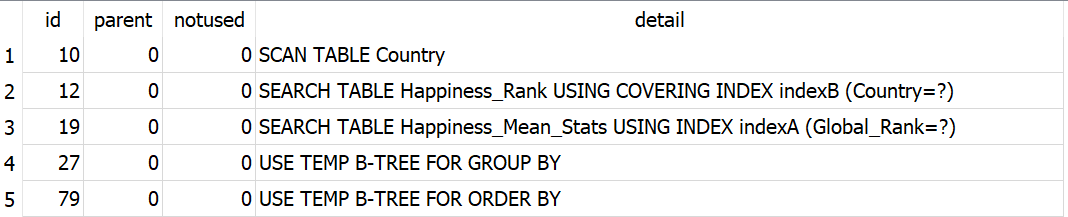

### Mongo Indexing

In [44]:
from pymongo import HASHED

Happiness['Happiness_Rank'].create_index([('Country', HASHED)])

Happiness['Happiness_Mean_Stats'].create_index([('Global_Rank', HASHED)])

'Global_Rank_hashed'

In [45]:
Happiness['Happiness_Rank'].index_information()
Happiness['Happiness_Mean_Stats'].index_information()

{'_id_': {'v': 2, 'key': [('_id', 1)]},
 'Global_Rank_hashed': {'v': 2, 'key': [('Global_Rank', 'hashed')]}}

In [46]:
#Happiness.Happiness_Rank.drop_index('Country_1')

#Happiness_Rank.drop_index('Country_hashed')

#Happiness.Happiness_Mean_Stats.drop_index('Happiness_Rank_hashed')

#Happiness.Happiness_Mean_Stats.drop_index('Happiness_Rank_1')

#### Testing

##### Complex Querys

In [47]:
## Join
### As regiões e paises respetivos com Happiness_Score superior a 7.5 ou seja as regiões mais felizes.

print("Country and Regions with Happiness_Score >= 7.5")


new_query = [
            { '$match': { 'Happiness_Score': { '$gt': 7.5 }}},
            {
            '$lookup': {
                'from': 'Happiness_Rank',
                'localField': 'Global_Rank',
                'foreignField': 'Global_Rank',
                'as': 'Happiness_Rank'
            }
        },
        {
          '$replaceRoot': {'newRoot': {'$mergeObjects': [{'$arrayElemAt': ["$Happiness_Rank", 0]}, "$$ROOT"]}}
        },
        {
            '$lookup': {
                'from': 'Country',
                'localField': 'Country',
                'foreignField': 'Country',
                'as': 'Country'
            }
        },
        {
            '$unwind': '$Country'
        },
        { '$project': {'Happiness_Rank':0,'Country._id':0, '_id':0, 'Region':0, 'Global_Rank':0, 'Happiness_Score':0, 'Mean_Economy':0, 'Mean_Freedom':0, 'Mean_Life_Expectancy':0, 'Mean_Social_Support':0, 'Mean_Absence_of_Corruption':0, 'Mean_Generosity': 0, 'Happiness_Rank_2015':0, 'Happiness_Rank_2016':0, 'Happiness_Rank_2017':0, 'Happiness_Rank_2018':0, 'Happiness_Rank_2019':0,}}

]

time_i = time.time()
result_new = Happiness.Happiness_Mean_Stats.aggregate(new_query)
time_f = time.time()
print('time expended ', time_f-time_i)

#for entry in result_new:
    #print(entry)


## Agreegate
### Contar distinc regions, selecionar countrys fazer media rank da region, media stats region
print("Regions ordered by AVG of corruption compared with rank")


query1 = [
        {
            '$lookup': {
                'from': 'Happiness_Rank',
                'localField': 'Country',
                'foreignField': 'Country',
                'as': 'Happiness_Rank'
            }
        },
        {
          '$replaceRoot': {'newRoot': {'$mergeObjects': [{'$arrayElemAt': ["$Happiness_Rank", 0]}, "$$ROOT"]}}
        },
        {
            '$lookup': {
                'from': 'Happiness_Mean_Stats',
                'localField': 'Happiness_Rank.Global_Rank',
                'foreignField': 'Global_Rank',
                'as': 'Happiness_Mean_Stats'
            }},
        {
          '$replaceRoot': {'newRoot': {'$mergeObjects': [{'$arrayElemAt': ["$Happiness_Mean_Stats", 0]}, "$$ROOT"]}}
        },
        { '$group': {'_id':'$Region', 
                     'Number of Countries': {'$sum': 1}, 
                     'Average Global Rank of the Region': {'$avg': '$Global_Rank'},
                     'Average Absense of Corruption Score': {'$avg': '$Mean_Absence_of_Corruption'}
                    }},
        { '$sort': {'Average Absense of Corruption Score':-1}}
        ]

time_i = time.time()
result = Happiness['Country'].aggregate(query1)
time_f = time.time()
print('time expended ', time_f-time_i)

#for entry in result:
    #print(entry)

Country and Regions with Happiness_Score >= 7.5
time expended  0.009003639221191406
Regions ordered by AVG of corruption compared with rank
time expended  0.0908820629119873


Execution stats showing the indexes are being used:
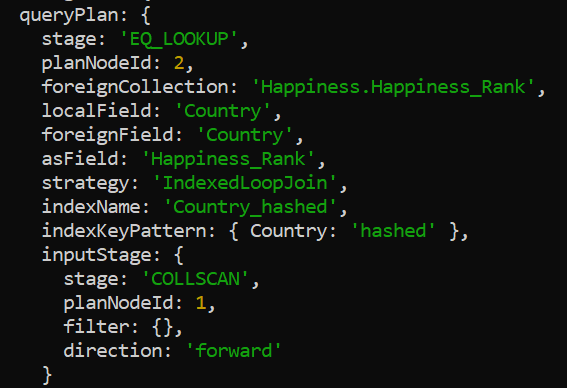
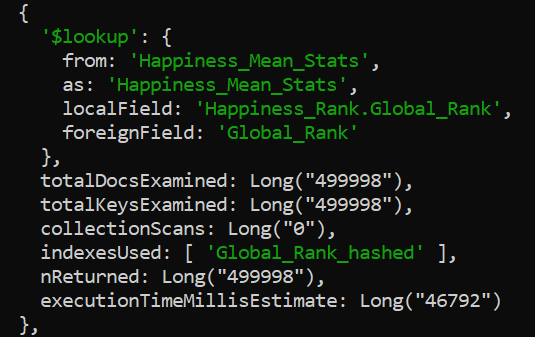

## Schema otimization

### Mongo Schema

In [48]:
client = MongoClient("localhost", 27017)
Happiness_remake = client.Happiness_remake

In [49]:
# Drop collections
Happiness_remake.Country.drop()
Happiness_remake.Happiness_Rank.drop()
Happiness_remake.Happiness_Mean_Stats.drop()

In [50]:
# Country
Happiness_remake.create_collection("Country")
Country_new = Country.copy(True)
Happiness_Mean_Stats_final_new = Happiness_Mean_Stats_final[['Global_Rank', 'Happiness_Score']].copy()
Country_remake = pd.concat([Country_new, Happiness_Mean_Stats_final_new], axis = 1)
Happiness_remake.Country.insert_many(Country_remake.to_dict("records"))

In [51]:
# Happiness Rank
Happiness_remake.create_collection("Happiness_Rank")
Happiness_Rank_remake = Happiness_Rank_final.copy(True)
Happiness_Rank_remake = Happiness_Rank_remake.drop(['Global_Rank'], axis = 1) 
Happiness_remake.Happiness_Rank.insert_many(Happiness_Rank_remake.to_dict("records"))

In [52]:
# Happiness Mean Stats
Happiness_Mean_Stats_remake = Happiness_Mean_Stats_final.copy(True)
Happiness_Mean_Stats_remake = Happiness_Mean_Stats_remake.drop(['Global_Rank'], axis = 1)
Happiness_Mean_Stats_remake_final = pd.concat([Country,Happiness_Mean_Stats_remake], axis = 1)
Happiness_Mean_Stats_remake_final = Happiness_Mean_Stats_remake_final.drop(['Region', 'Happiness_Score'], axis = 1)
Happiness_remake.Happiness_Mean_Stats.insert_many(Happiness_Mean_Stats_remake_final.to_dict("records"))

#### Testing

##### Data Increase

In [53]:
'''
client = MongoClient("localhost", 27017)


Happiness = client.Happiness_remake
country = []
happiness_Rank = []
happiness_Mean_Stats = []
for i in range(171, 500000):
    country.append({ "Country" : str(i), "Region":'Western Europe', 'Global_Rank': i, 'Happiness_Score': random.uniform(0, 10) })
    happiness_Rank.append({ "Country":str(i), "Happiness_Rank_2015": 159,"Happiness_Rank_2016": 158,"Happiness_Rank_2017": 156,"Happiness_Rank_2018": 157,"Happiness_Rank_2019": 157
                                      })
    happiness_Mean_Stats.append({ "Country": str(i) , 
                                            "Mean_Economy": .005,
                                            "Mean_Freedom": .1,
                                            "Mean_Life_Expectancy": .2,
                                            "Mean_Social_Support": .3,
                                            "Mean_Absence_of_Corruption": .05,
                                            "Mean_Generosity": .06
                                    })



print("INSERTING ..........")
Happiness.Country.insert_many( country)

Happiness.Happiness_Rank.insert_many( happiness_Rank)

Happiness.Happiness_Mean_Stats.insert_many( happiness_Mean_Stats)
client.close()

'''

'\nclient = MongoClient("localhost", 27017)\n\n\nHappiness = client.Happiness_remake\ncountry = []\nhappiness_Rank = []\nhappiness_Mean_Stats = []\nfor i in range(171, 500000):\n    country.append({ "Country" : str(i), "Region":\'Western Europe\', \'Global_Rank\': i, \'Happiness_Score\': random.uniform(0, 10) })\n    happiness_Rank.append({ "Country":str(i), "Happiness_Rank_2015": 159,"Happiness_Rank_2016": 158,"Happiness_Rank_2017": 156,"Happiness_Rank_2018": 157,"Happiness_Rank_2019": 157\n                                      })\n    happiness_Mean_Stats.append({ "Country": str(i) , \n                                            "Mean_Economy": .005,\n                                            "Mean_Freedom": .1,\n                                            "Mean_Life_Expectancy": .2,\n                                            "Mean_Social_Support": .3,\n                                            "Mean_Absence_of_Corruption": .05,\n                                            "Mea

##### Indexing

In [54]:
#Apply Indexing

from pymongo import HASHED

Happiness_remake['Happiness_Rank'].create_index([('Country', HASHED)])
Happiness_remake['Happiness_Mean_Stats'].create_index([('Country', HASHED)])

print(Happiness_remake['Happiness_Rank'].index_information())
Happiness_remake['Happiness_Mean_Stats'].index_information()

{'_id_': {'v': 2, 'key': [('_id', 1)]}, 'Country_hashed': {'v': 2, 'key': [('Country', 'hashed')]}}


{'_id_': {'v': 2, 'key': [('_id', 1)]},
 'Country_hashed': {'v': 2, 'key': [('Country', 'hashed')]}}

In [55]:
#Happiness_remake['Happiness_Rank'].drop_index([('Country', HASHED)])
#Happiness_remake['Happiness_Mean_Stats'].drop_index([('Country', HASHED)])

##### Complex Querys

In [56]:
## Join
### Country and Regions with Happiness_Score >= 7.5
print("Country and Regions with Happiness_Score >= 7.5")
time_i = time.time()
result = Happiness_remake.Country.find( {"Happiness_Score": { "$gte": 7.5} } )
time_f = time.time()
print('time expended ', time_f-time_i)
#for entry in result:
  #print(entry)

## Agreegate
### Contar distinc regions, selecionar countrys fazer media rank da region, media stats region
print("Regions ordered by AVG of corruption compared with rank")
query1 = [
        {
            '$lookup': {
                'from': 'Happiness_Mean_Stats',
                'localField': 'Country',
                'foreignField': 'Country',
                'as': 'Happiness_Mean_Stats'
            }
        },
        {
          '$replaceRoot': {'newRoot': {'$mergeObjects': [{'$arrayElemAt': ["$Happiness_Mean_Stats", 0]}, "$$ROOT"]}}
          
        },
       
        { '$group': {'_id':'$Region', 
                     'Number of Countries': {'$sum': 1}, 
                     'Average Global Rank of the Region': {'$avg': '$Global_Rank'},
                     'Average Absense of Corruption Score': {'$avg': '$Mean_Absence_of_Corruption'}
                    }},
        { '$sort': {'Average Absense of Corruption Score':-1}}
        ]

time_i = time.time()
result = Happiness_remake['Country'].aggregate(query1)
time_f = time.time()
print('time expended ', time_f-time_i)

#for entry in result:
  #print(entry)

Country and Regions with Happiness_Score >= 7.5
time expended  0.0009837150573730469
Regions ordered by AVG of corruption compared with rank
time expended  0.02299976348876953


### SQLite Schema

In [57]:
# New db creation
db = sqlite3.connect("Happiness2.db")
cur = db.cursor()

In [58]:
# Delete all tables

#cur.execute('DROP TABLE Happiness_Mean_Stats_v1;')
#cur.execute('DROP TABLE Happiness_Mean_Stats_v2;')
#cur.execute('DROP TABLE Country;')
#cur.execute('DROP TABLE Country_v1;')
#cur.execute('DROP TABLE Country_v2;')
cur.execute('DROP TABLE Country_remake;')
cur.execute('DROP TABLE Happiness_Rank;')
cur.execute('DROP TABLE Happiness_Mean_Stats;')


In [59]:
db.commit()

In [60]:
# Country Table
cur.execute('''CREATE TABLE Country (
Country TEXT PRIMARY KEY,
Region TEXT);''')

#insert data
Country.to_sql(name="Country", if_exists= "append", con=db, index = False)

db.commit()

In [61]:
# Happiness_Rank Table
cur.execute('''CREATE TABLE Happiness_Rank(
Global_Rank INTEGER,
Country TEXT,
Happiness_Rank_2015 INTEGER,
Happiness_Rank_2016 INTEGER,
Happiness_Rank_2017 INTEGER,
Happiness_Rank_2018 INTEGER,
Happiness_Rank_2019 INTEGER,
FOREIGN KEY(Country)
    REFERENCES Country (Country));''')

    
#insert data   
Happiness_Rank_final.to_sql(name="Happiness_Rank", if_exists= "append", con=db, index = False)



db.commit()

In [62]:
# Happiness_Mean_Stats Table
cur.execute('''CREATE TABLE Happiness_Mean_Stats(
Global_Rank INTEGER,
Happiness_Score FLOAT,
Mean_Economy FLOAT,
Mean_Freedom FLOAT,
Mean_Life_Expectancy FLOAT,
Mean_Social_Support FLOAT,
Mean_Absence_of_Corruption FLOAT,
Mean_Generosity FLOAT);''')

#insert data   
Happiness_Mean_Stats_final.to_sql(name="Happiness_Mean_Stats", if_exists= "append", con=db, index = False)
db.commit()



In [63]:
# New version of Country Table, containing Global_Rank and Happiness_Score

cur.execute("CREATE TABLE Country_v1 AS SELECT Country.*, Happiness_Rank.Global_Rank, Happiness_Mean_Stats.Happiness_Score FROM Country LEFT JOIN Happiness_Rank ON Happiness_Rank.Country = Country.Country LEFT JOIN Happiness_Mean_Stats ON Happiness_Rank.Global_Rank = Happiness_Mean_Stats.Global_Rank ORDER BY Happiness_Rank.Global_Rank ASC")

cur.execute('DROP TABLE Country')

cur.execute('''CREATE TABLE Country_v2(
    Country TEXT PRIMARY KEY,
    Region TEXT,
    Global_Rank INTEGER,
    Happiness_Score FLOAT);''')

cur.execute("INSERT INTO Country_v2 SELECT * FROM Country_v1")

cur.execute('DROP TABLE Country_v1;')

cur.execute("ALTER TABLE Country_v2 RENAME TO Country_remake")

db.commit()


In [64]:
# New version of  Happiness_Mean_Stats, without happiness_score and Global_Rank

cur.execute("CREATE TABLE Happiness_Mean_Stats_v1 AS SELECT Country_remake.Country, Happiness_Mean_Stats.* FROM Country_remake LEFT JOIN Happiness_Mean_Stats ON Country_remake.Global_Rank = Happiness_Mean_Stats.Global_Rank ")

cur.execute('''ALTER TABLE Happiness_Mean_Stats_v1 DROP COLUMN Global_Rank''')
cur.execute('''ALTER TABLE Happiness_Mean_Stats_v1 DROP COLUMN Happiness_Score''')

cur.execute('DROP TABLE Happiness_Mean_Stats')

cur.execute('''CREATE TABLE Happiness_Mean_Stats_v2(
Country TEXT,
Mean_Economy FLOAT,
Mean_Freedom FLOAT,
Mean_Life_Expectancy FLOAT,
Mean_Social_Support FLOAT,
Mean_Absence_of_Corruption FLOAT,
Mean_Generosity FLOAT,
FOREIGN KEY(Country)
   REFERENCES Country (Country));''')

cur.execute("INSERT INTO Happiness_Mean_Stats_v2 SELECT * FROM Happiness_Mean_Stats_v1")

cur.execute('DROP TABLE Happiness_Mean_Stats_v1;')

cur.execute("ALTER TABLE Happiness_Mean_Stats_v2 RENAME TO Happiness_Mean_Stats")

cur.execute('''ALTER TABLE Happiness_Rank DROP COLUMN Global_Rank''')

db.commit()

#### Testing

##### Data Increase

In [65]:
'''
db = sqlite3.connect("Happiness2.db")
cur = db.cursor()

v = 'v'

for i in range(172, 500000):
    r = random.uniform(0, 10)
    cur.execute("INSERT INTO Country_remake VALUES({}, 'Western Europe', {}, {})".format(str(i), i, r))

    cur.execute("INSERT INTO Happiness_Rank VALUES({}, 159, 158, 156, 157, 157)".format(i, str(i)))

    cur.execute("INSERT INTO Happiness_Mean_Stats VALUES({}, .005, .1, .2, .3, .05, .06)".format(i, r))

db.commit()

'''

'\ndb = sqlite3.connect("Happiness2.db")\ncur = db.cursor()\n\nv = \'v\'\n\nfor i in range(172, 500000):\n    r = random.uniform(0, 10)\n    cur.execute("INSERT INTO Country_remake VALUES({}, \'Western Europe\', {}, {})".format(str(i), i, r))\n\n    cur.execute("INSERT INTO Happiness_Rank VALUES({}, 159, 158, 156, 157, 157)".format(i, str(i)))\n\n    cur.execute("INSERT INTO Happiness_Mean_Stats VALUES({}, .005, .1, .2, .3, .05, .06)".format(i, r))\n\ndb.commit()\n\n'

##### Indexing

In [66]:
#Apply Indexing
multi_col = "CREATE UNIQUE INDEX indexA ON Happiness_Mean_Stats (Country);"
cur.execute(multi_col)

multi_col = "CREATE UNIQUE INDEX indexB ON Happiness_Rank (Country);"
cur.execute(multi_col)

##### Complex Query

In [67]:
### As regiões e paises respetivos com Happiness_Score superior a 7.5 ou seja as regiões mais felizes.
print("Country and Regions with Happiness_Score >= 7.5")
time_i = time.time()
cur.execute("SELECT Country, Region FROM Country_remake WHERE Happiness_Score >= 7.5")
time_f = time.time()
print('time expended ', time_f-time_i)

### Relacionar a  avg do Global_Rank com a avg da Mean_Absence_of_Corruption, permitindo assim observar uma relação entre ambas as métricas e as regiões / paises correspondentes
print("Regions ordered by AVG of corruption compared with rank")
time_i = time.time()
cur.execute("SELECT Region, COUNT(*), AVG(Country_remake.Global_Rank), AVG(Happiness_Mean_Stats.Mean_Absence_of_Corruption) FROM Country_remake LEFT JOIN Happiness_mean_Stats ON Happiness_mean_Stats.Country = Country_remake.Country GROUP BY Region ORDER BY AVG(Mean_Absence_of_Corruption)")
time_f = time.time()
print('time expended ', time_f-time_i)

Country and Regions with Happiness_Score >= 7.5
time expended  0.001001596450805664
Regions ordered by AVG of corruption compared with rank
time expended  0.0020101070404052734


Regiões com happiness score e economy

In [70]:
print("Regions with AVG Happiness Score and Economy Score")


query1 = [
        {
            '$lookup': {
                'from': 'Happiness_Rank',
                'localField': 'Country',
                'foreignField': 'Country',
                'as': 'Happiness_Rank'
            }
        },
        {
          '$replaceRoot': {'newRoot': {'$mergeObjects': [{'$arrayElemAt': ["$Happiness_Rank", 0]}, "$$ROOT"]}}
        },
        {
            '$lookup': {
                'from': 'Happiness_Mean_Stats',
                'localField': 'Happiness_Rank.Global_Rank',
                'foreignField': 'Global_Rank',
                'as': 'Happiness_Mean_Stats'
            }},
        {
          '$replaceRoot': {'newRoot': {'$mergeObjects': [{'$arrayElemAt': ["$Happiness_Mean_Stats", 0]}, "$$ROOT"]}}
        },
        { '$group': {'_id':'$Region', 
                     'Average Happiness Score of the Region': {'$avg': '$Happiness_Score'},
                     'Average Economy Score': {'$avg': '$Mean_Economy'}
                    }},
        { '$sort': {'Average Happiness Score of the Region':-1}}
        ]

result = Happiness['Country'].aggregate(query1)
for entry in result:
    print(entry)

Regions with AVG Happiness Score and Economy Score
{'_id': 'Australia and New Zealand', 'Average Happiness Score of the Region': 7.294600004959107, 'Average Economy Score': 1.356197098312378}
{'_id': 'North America', 'Average Happiness Score of the Region': 7.174700001525879, 'Average Economy Score': 1.4220373700294489}
{'_id': 'Western Europe', 'Average Happiness Score of the Region': 6.740250796666221, 'Average Economy Score': 1.371103768319872}
{'_id': 'Latin America and Caribbean', 'Average Happiness Score of the Region': 6.067440002507527, 'Average Economy Score': 0.9688645770233664}
{'_id': 'Eastern Asia', 'Average Happiness Score of the Region': 5.7240499962806695, 'Average Economy Score': 1.2965576163587573}
{'_id': 'Central and Eastern Europe', 'Average Happiness Score of the Region': 5.4331129036072765, 'Average Economy Score': 1.024729719569114}
{'_id': 'Middle East and Northern Africa', 'Average Happiness Score of the Region': 5.397839996910095, 'Average Economy Score': 1.1